# Laboratorio 4 - Regresiones
Marco Fuentes - 18188

In [93]:
!{sys.executable} -m pip install -r requirements.txt
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#!{sys.executable} -m pip install seaborn
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#!{sys.executable} -m pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

### Carga de dataset a memoria

In [35]:
dataframe = pd.read_csv('insurance.csv')

### Exploración previa del dataset

In [4]:
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [5]:
dataframe.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


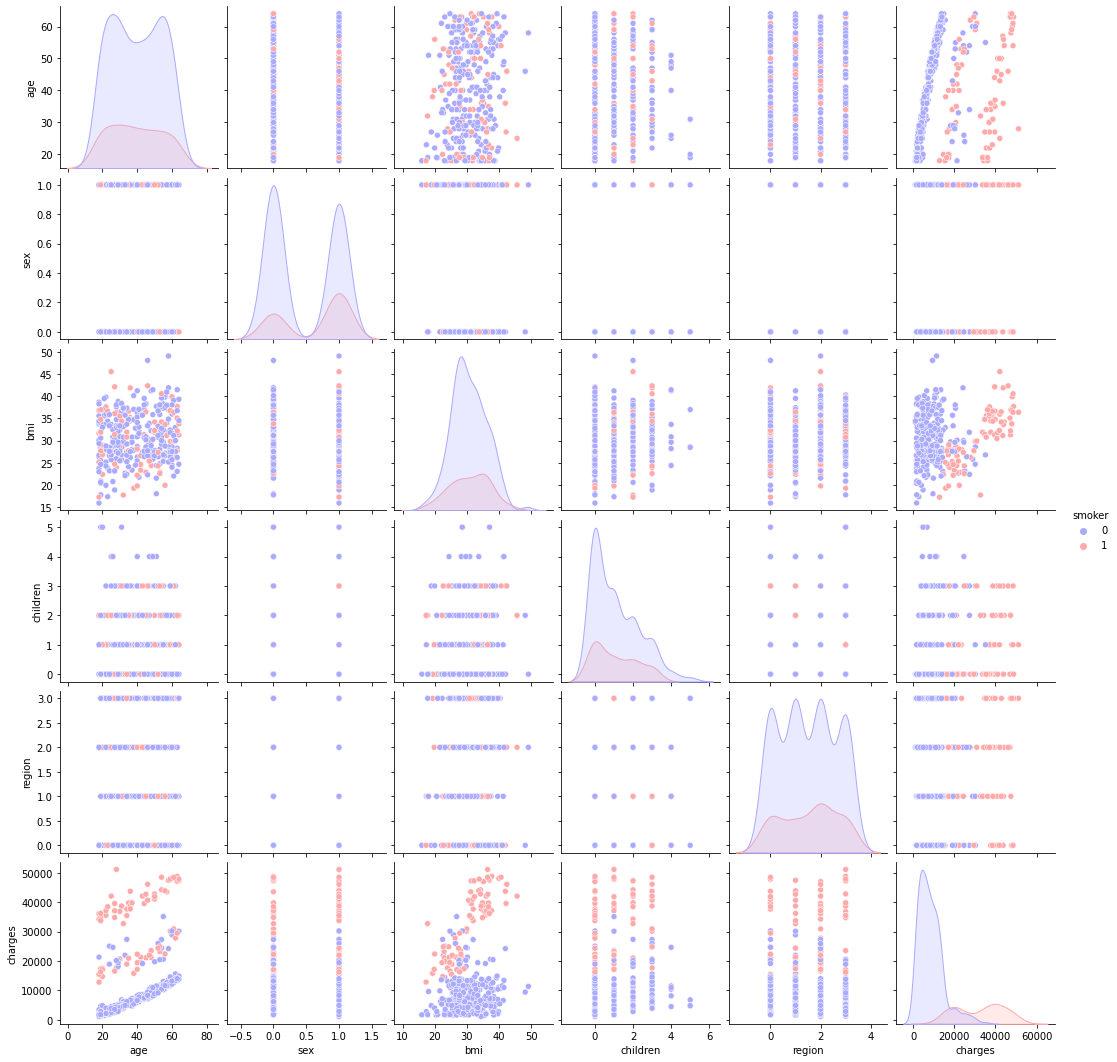

In [6]:
sns.pairplot(data=dataframe, hue="smoker", palette="bwr")

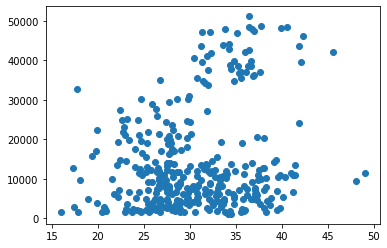

In [7]:
x = dataframe['bmi']
y = dataframe['charges']
plt.scatter(x, y)
plt.show()

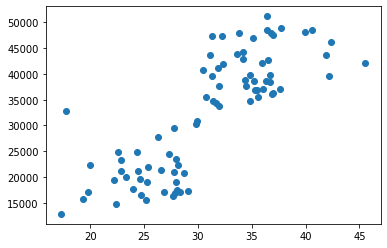

In [8]:
# Si solo consideramos a los fumadores, aparece un patron mas evidente.
x = dataframe[dataframe['smoker']==1]['bmi']
y = dataframe[dataframe['smoker']==1]['charges']
plt.scatter(x, y)
plt.show()

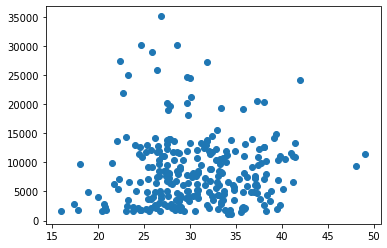

In [36]:
# Caso contratio si solo consideramos a los no fumadores
x = dataframe[dataframe['smoker']==0]['bmi']
y = dataframe[dataframe['smoker']==0]['charges']
plt.scatter(x, y)
plt.show()

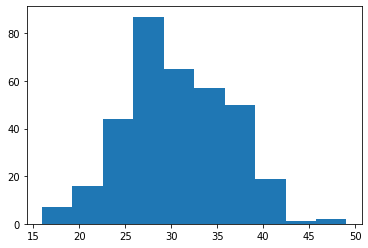

In [9]:
plt.hist(dataframe['bmi'])
plt.show()

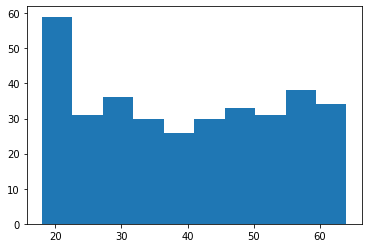

In [10]:
plt.hist(dataframe['age'])
plt.show()

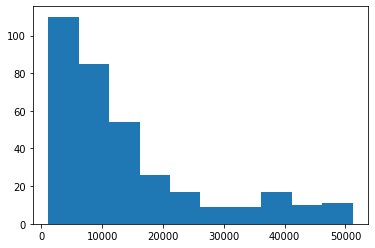

In [11]:
plt.hist(dataframe['charges'])
plt.show()

In [12]:
# Para ver si hay algo que no cuadre
dataframe.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [13]:
labelEncoder = LabelEncoder()
sex_types = ('Male', 'Female')
sex_df = pd.DataFrame(sex_types, columns=['sex_category'])
dataframe['sex_category'] = labelEncoder.fit_transform(dataframe['sex'])
dataframe.head()

,age,sex,bmi,children,smoker,region,charges,sex_category
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1


In [14]:
dataframe.describe()

,age,sex,bmi,children,smoker,region,charges,sex_category
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293,0.508621
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852,0.500646
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000,0.000000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125,0.000000
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250,1.000000
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150,1.000000
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140,1.000000


### Preparación de la data en grupos de prueba y entrenamiento

In [15]:
target = dataframe['charges']
dataframe = dataframe.drop(columns=['charges'])
dataframe = dataframe[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(dataframe, target, test_size = 0.33)

In [16]:
scaler = StandardScaler()
scaler.fit(dataframe)

StandardScaler()

In [17]:
X_train.mean()

bmi    30.671052
dtype: float64

### Modelo de regresión lineal desde 0

In [18]:
# Promedio de inputs y outputs
x_mean = np.mean(X_train['bmi'].values)
y_mean = np.mean(y_train.values)
# Numero total de datos
n = len(X_train)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X_train['bmi'].values[i] - x_mean) * (y_train.values[i] - y_mean)
    denominator += (X_train['bmi'].values[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

print(b0, b1)

1801.5331595116368 390.526730137782


In [19]:
rmse = 0
for i in range(n):
    y=  b0 + b1* X_train.values[i]
    rmse += (y_train.values[i] - y) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

[12420.46635425]


In [20]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X_train.values[i]
    sumofsquares += (y_train.values[i] - y_mean) ** 2
    sumofresiduals += (y_train.values[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

[0.03205176]


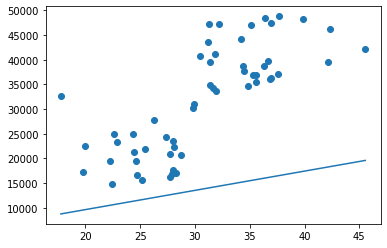

In [88]:
plt.scatter(X_train['bmi'].values, y_train)
x_max = np.max(X_train) 
x_min = np.min(X_train) 
x = np.linspace(x_min, x_max)
y = b0 + b1 * x
plt.plot(x,y)
plt.show()

### Usando LinearRegression y Lasso de sklearn

In [22]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [24]:
reg.coef_

array([390.52673014])

In [25]:
mean_absolute_error(reg.predict(X_test), y_test)

9552.470936878

In [26]:
mean_squared_error(reg.predict(X_test), y_test)

148974892.61378884

In [27]:
r2_score(reg.predict(X_test), y_test)

-34.34316140998877

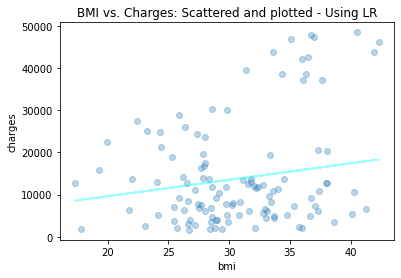

COEF:  [390.52673014]


In [28]:
plt.scatter(X_test['bmi'], y_test, alpha=0.3)
plt.plot(X_test, reg.predict(X_test), color='cyan', alpha=0.4)
plt.title('BMI vs. Charges: Scattered and plotted - Using LR')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
print('COEF: ', reg.coef_)

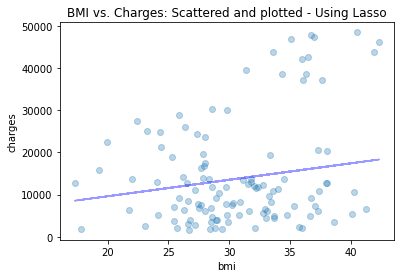

COEF:  [390.52374458]


In [29]:
plt.scatter(X_test['bmi'], y_test, alpha=0.3)
plt.plot(X_test, lasso.predict(X_test), color='b', alpha=0.4)
plt.title('BMI vs. Charges: Scattered and plotted - Using Lasso')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
print('COEF: ', lasso.coef_)

# Regresión Polinomial

In [30]:
dataframe = pd.read_csv('insurance.csv')

In [31]:
#dataframe = dataframe[dataframe['smoker']==0][dataframe['charges']<15000]
target = dataframe['charges']
dataframe = dataframe.drop(columns=['charges'])
dataframe = dataframe[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(dataframe, target, test_size = 0.33)

27


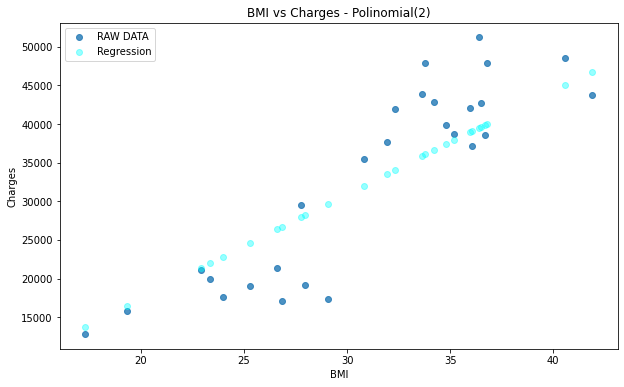

In [89]:
poly = PolynomialFeatures()
poly_train = poly.fit_transform(X_train)
poly_test = poly.fit_transform(X_test)
pl = LinearRegression()
pl.fit(poly_train, y_train)
#print(mean_squared_error(pl.predict(poly_train), y_train))
#print(r2_score(pl.predict(poly_train), y_train))
#print(mean_squared_error(pl.predict(poly_test), y_test))
#print(r2_score(pl.predict(poly_test), y_test))

plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, alpha=0.8, label='RAW DATA')

plt.scatter(X_test, pl.predict(poly_test), color='cyan', alpha = 0.4 ,label='Regression')
print(len(pl.predict(poly_test)))
pl.predict(poly_test)
plt.title('BMI vs Charges - Polinomial(2)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

### Explorando opciones

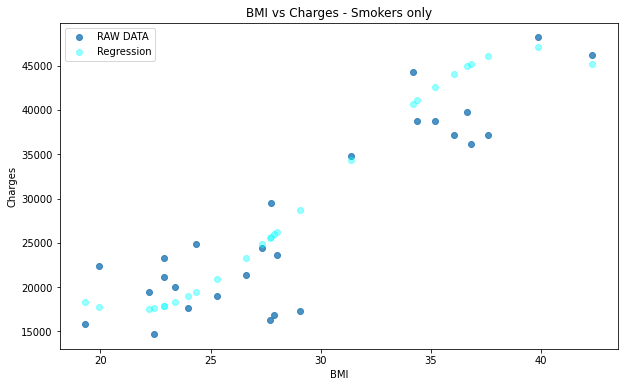

In [91]:
dataframe = pd.read_csv('insurance.csv')

data = dataframe[dataframe['smoker']==1]

target = data['charges']
data = data.drop(columns=['charges'])
data = data[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.33)

# Probar con un polinomio de grado 3
poly = PolynomialFeatures(3)
poly_train = poly.fit_transform(X_train)
poly_test = poly.fit_transform(X_test)
pl = LinearRegression()
pl.fit(poly_train, y_train)

plt.figure(figsize=(10,6))

plt.scatter(X_test, y_test, alpha=0.8, label='RAW DATA')
plt.scatter(X_test, pl.predict(poly_test), color='cyan', alpha = 0.4, label='Regression')
pl.predict(poly_test)
plt.title('BMI vs Charges - Smokers only')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

<ipython-input-92-931c8fba98a2>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().get_xaxis().set_visible(False)
<ipython-input-92-931c8fba98a2>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().get_yaxis().set_visible(False)


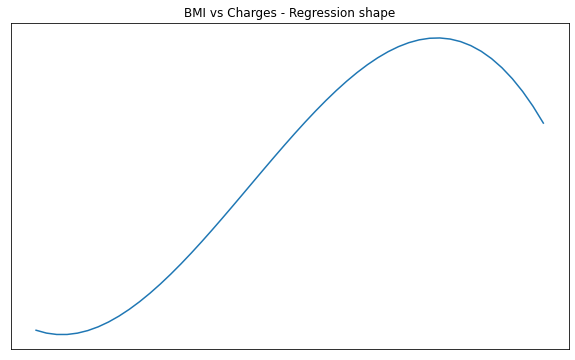

In [92]:
# Forma de la funcion resultante
x = np.linspace(20,45)

y = pl.coef_[0] + pl.coef_[1]*x + pl.coef_[2]*x**2 + pl.coef_[3]*x**3
plt.figure(figsize=(10,6))
plt.plot(x,y)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.title('BMI vs Charges - Regression shape')
plt.show()